# User Analysis Overview

## Load Data

In [2]:
# Libraries we will need for loading and preprocessing the data

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from plot_dataframe import Plot_Df

import warnings
warnings.filterwarnings(action="ignore")

# to know which filepath to use to get to the source data
import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ModuleNotFoundError: No module named 'plot_dataframe'

In [2]:
# Load data

df_clean = pd.read_csv('../data\cleaned_data.csv', na_values=['?', None])
df_clean

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Social Media Total Data Volume,Youtube Total Data Volume,Netflix Total Data Volume,Google Total Data Volume,Email Total Data Volume,Gaming Total Data Volume,Other Total Data Volume,Throughput Total,RTT Total,TCP Total
0,0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,1.570185e+06,1.835594e+07,1.785519e+07,2.905912e+06,3.701304e+06,2.924265e+08,1.805588e+08,67.0,47.0,NaN
1,1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,1.933278e+06,3.935912e+07,3.556554e+07,4.414096e+06,9.373850e+05,6.099208e+08,5.419594e+08,42.0,70.0,NaN
2,2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,1.726277e+06,3.442524e+07,2.375120e+07,1.022912e+07,3.363124e+06,2.299803e+08,4.149084e+08,15.0,NaN,NaN
3,3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,6.574930e+05,3.653476e+07,1.509259e+07,1.181176e+07,2.070983e+06,8.103879e+08,7.618372e+08,88.0,NaN,NaN
4,4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,9.127880e+05,3.422225e+07,1.753980e+07,7.748843e+06,2.110349e+06,5.312370e+08,5.646198e+08,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,...,3.517065e+06,2.795510e+07,3.756186e+07,1.278491e+07,6.908760e+05,5.358069e+08,1.675193e+07,117.0,32.0,NaN
149997,149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,...,2.352181e+06,2.216552e+07,4.064329e+07,4.415361e+06,2.121718e+06,6.316281e+08,7.146381e+08,77.0,29.0,NaN
149998,149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,...,1.260239e+06,2.451641e+07,1.502970e+07,6.585469e+06,2.058277e+06,5.669338e+08,1.324156e+08,90.0,49.0,NaN
149999,149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,...,8.231090e+05,1.712251e+07,1.649484e+07,7.757267e+06,2.850914e+06,3.550664e+08,8.161200e+08,71.0,42.0,NaN


In [1]:
# using plot_dataframe

make_plot = Plot_Df()

NameError: name 'Plot_Df' is not defined

## Handsets

In [3]:
# Top 10 handsets used by the customers

top10_handsets = df_clean['Handset Type'].value_counts().head(10)
top10_handsets

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [4]:
# Bottom 10 handsets used by the customers

bot10_handsets = df_clean['Handset Type'].value_counts().tail(10)
bot10_handsets

A-Link Telecom I. Cubot Power                              1
A-Link Telecom I. Cubot Note Plus                          1
Xiaomi Communica. M1901F7G                                 1
Lemobile Informa. Le X820                                  1
Huawei Stf-Tl10                                            1
Tct Mobile Suzho. Alcatel One Touch Y580D                  1
Shenzhen Fortune. M-Ppas6                                  1
Wiko Global Sasu Wiko Ridge 4G                             1
Hongkong Ipro Te. Ipro I9350 I9400 S3 Wave 3.5 Wave 4.0    1
Shenzhen Jeko Co. Blackview Bv5800 Pro                     1
Name: Handset Type, dtype: int64

In [5]:
# Top 3 handset manufacturers

top3_manufs = df_clean['Handset Manufacturer'].value_counts().head(3)
top3_manufs

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [6]:
# Bottom 3 handset manufacturers

bot3_manufs = df_clean['Handset Manufacturer'].value_counts().tail(3)
bot3_manufs

Vastking Technology (Hk) Limited    1
Mobiwire Sas                        1
Shenzhen Gaoxinqi                   1
Name: Handset Manufacturer, dtype: int64

In [7]:
# Top 5 handsets per top 3 handset manufacturer

top3_manufs = df_clean[df_clean["Handset Manufacturer"].isin(top3_manufs.index.tolist())] #**
top5_handsets_per_top3_manufs = top3_manufs['Handset Type'].groupby(df_clean['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top5_handsets_per_top3_manufs

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ

In [8]:
# Bottom 5 handsets per top 3 handset manufacturer

bot3_manufs = df_clean[df_clean["Handset Manufacturer"].isin(top3_manufs.index.tolist())] #**
bot5_handsets_per_top3_manufs = top3_manufs['Handset Type'].groupby(df_clean['Handset Manufacturer']).apply(lambda x: x.value_counts().tail(5))
bot5_handsets_per_top3_manufs

Handset Manufacturer                                 
Apple                 Apple iPhone 5S (A1528)            1
                      Apple iPhone 7 (A1780)             1
                      Apple iPhone 4S (A1431)            1
                      Apple iPad Mini (A1600)            1
                      Apple iPhone Xs (A2098)            1
Huawei                Huawei Stf-Tl10                    1
                      Huawei U8815                       1
                      Huawei Bnd-Al10                    1
                      Huawei Fig-La1                     1
                      Huawei Mediapad T5 10 Pro          1
Samsung               Samsung Galaxy Tab A2 Xl           1
                      Samsung Galaxy Tab E (Sm-T561)     1
                      Samsung Gt-I8260                   1
                      Samsung Google Nexus (Gt-I9250)    1
                      Samsung Galaxy S4 (Sgh-I337M)      1
Name: Handset Type, dtype: int64

### Recommendation to Marketing Teams
<li>To invest in Apple, Huawei and Samsung devices as they are the most popular on the market
<li>That they stock more of the top 5 handsets by the top 3 manufacturers and phase out the bottom 5 handsets so as to make more sales
<li>That the services offered by TellCo be compatible with Huawei B528S-23A devices as they are the most popular devices on the market by far

## Aggregate per user 

Text(0.5, 1.0, 'users with highest session numbers')

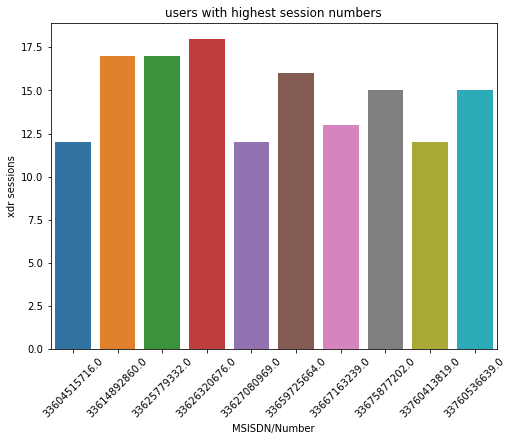

In [9]:
# aggregating per user the number of xDR sessions

xdr_sess = df_clean[['Bearer Id', 'MSISDN/Number']]
a = xdr_sess.groupby('MSISDN/Number').count()
a.columns = ['xdr sessions']
a.head()

t = a.sort_values(by = 'xdr sessions', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['xdr sessions'])
plt.xticks(rotation = 45)
plt.title('users with highest session numbers')

Text(0.5, 1.0, 'users with longest session duration')

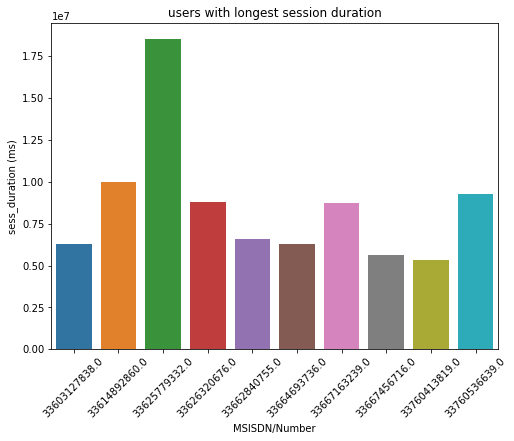

In [10]:
# aggregating per user the session duration

duration = df_clean[['Dur. (ms)', 'MSISDN/Number']]
b = duration.groupby('MSISDN/Number').sum()
b.columns = ['sess_duration (ms)']
b.head()

t = b.sort_values(by = 'sess_duration (ms)', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['sess_duration (ms)'])
plt.xticks(rotation = 45)
plt.title('users with longest session duration')

In [11]:
# aggregating per user the total download(dl) and upload(ul) data

byte = df_clean[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total UL+DL']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

# plotting a sample of the data
# t = c.sample(10)
# pos = list(range(len(t['Total UL (Bytes)'])))
# width = 0.25
# fig, ax = plt.subplots(figsize=(10,12))
# plt.bar(pos, t['Total UL (Bytes)'], width, alpha=0.5, color='b')
# plt.bar([p + width for p in pos], t['Total DL (Bytes)'], width, alpha=0.5, color='r')
# plt.bar([p + width*2 for p in pos], t['Total UL+DL'], width, alpha=0.5, color='g')
# ax.set_ylabel('bytes')
# ax.set_title('Bytes data per user')
# ax.set_xticks([p + 1.5 * width for p in pos])
# ax.set_xticklabels(c.index)
# plt.xticks(rotation = 45)

# plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(t['Total UL (Bytes)'] + t['Total DL (Bytes)'] + t['Total UL+DL'])] )
# plt.legend(['Upload Bytes', 'Download Bytes', 'Total Bytes'], loc='upper left')
# plt.grid()
# plt.title('A sample of users upload, download and Total UL+DL bytes')

,Total UL (Bytes),Total DL (Bytes),Total UL+DL
MSISDN/Number,,,
3.360100e+10,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,94280527.0,1.363130e+09,1.457411e+09


In [13]:
# aggregating per user the total data volume(in bytes) during this session for each application

apps = df_clean[['MSISDN/Number','Social Media Total Data Volume', 'Youtube Total Data Volume', 'Netflix Total Data Volume', 'Google Total Data Volume', 'Email Total Data Volume', 'Gaming Total Data Volume', 'Other Total Data Volume']]
d = apps.groupby('MSISDN/Number').sum()
d

,Social Media Total Data Volume,Youtube Total Data Volume,Netflix Total Data Volume,Google Total Data Volume,Email Total Data Volume,Gaming Total Data Volume,Other Total Data Volume
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,21624548.0,27180981.0,4389005.0,1331362.0,8.124587e+08,386570872.0
3.360100e+10,2660565.0,12432223.0,11221763.0,5334863.0,3307781.0,1.197501e+08,281710071.0
3.360100e+10,3195623.0,21333570.0,19353900.0,3443126.0,3205380.0,5.388277e+08,501693672.0
3.360101e+10,280294.0,6977321.0,1942092.0,9678493.0,2284670.0,3.911261e+08,35279702.0
3.360101e+10,2912542.0,41533002.0,49201724.0,18499616.0,3305469.0,1.314798e+09,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,300183.0,26647843.0,14902538.0,7531269.0,1006915.0,6.603614e+08,295282817.0
3.379000e+10,498569.0,19851572.0,8531060.0,5429705.0,2514097.0,4.370033e+08,211115113.0
3.197021e+12,715224.0,11959905.0,26592300.0,10438660.0,1520771.0,1.780487e+08,470526473.0


## Non-Graphical Univariate Analysis

In [14]:
# show the basic metrics (mean, standard deviation, deciles)

df_clean.describe()

,Unnamed: 0,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Social Media Total Data Volume,Youtube Total Data Volume,Netflix Total Data Volume,Google Total Data Volume,Email Total Data Volume,Gaming Total Data Volume,Other Total Data Volume,Throughput Total,RTT Total,TCP Total
count,150001.000000,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150000.000000,122161.000000,5.047100e+04
mean,75000.000000,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.828250e+06,2.264348e+07,2.262861e+07,7.807295e+06,2.259102e+06,4.303331e+08,4.293653e+08,15070.474573,127.024885,2.571697e+07
std,43301.703202,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,1.035646e+06,9.246800e+06,9.260820e+06,3.516420e+06,1.071109e+06,2.440199e+08,2.432681e+08,26825.844512,622.521925,2.013708e+08
min,0.000000,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,1.563000e+03,7.890300e+04,9.843200e+04,4.033000e+04,8.359000e+03,3.063580e+05,1.490450e+05,0.000000,0.000000,8.600000e+01
25%,37500.000000,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,9.322180e+05,1.599846e+07,1.597946e+07,4.943599e+06,1.359344e+06,2.187279e+08,2.185534e+08,90.000000,38.000000,1.609250e+05
50%,75000.000000,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.826471e+06,2.266177e+07,2.263554e+07,7.812835e+06,2.263567e+06,4.316150e+08,4.299865e+08,125.000000,54.000000,1.186969e+06
75%,112500.000000,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,2.727487e+06,2.929260e+07,2.929044e+07,1.068280e+07,3.159818e+06,6.414159e+08,6.399275e+08,22348.250000,92.000000,5.612934e+06
max,150000.000000,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,3.650861e+06,4.519008e+07,4.519815e+07,1.552878e+07,4.518036e+06,8.592028e+08,8.595209e+08,382262.000000,96924.000000,4.344116e+09


## Graphical Univariate Analysis

From the feature extraction we did in the data extraction and modelling notebook,
features we can tell are of interest are: 
<li>Total UL+DL
<li>Social Media Total Data Volume
<li>Youtube Total Data Volume
<li>Google Total Data Volume
<li>Email Total Data Volume
<li>Gaming Total Data Volume
<li>Other [activities] Total Data Volume
<li>Throughput Total
<li>Round Trip Time Total
<li>TCP Total


In [15]:
# plotting a histogram on the column: Total UL+DL

df_clean.hist(df_clean, 'Total UL+DL', 'red')
df_clean[df_clean['Total UL+DL'] >= 0].hist(bins=100)
plt.show()

TypeError: unhashable type: 'DataFrame'

In [ ]:
# plotting a histogram on the column: Social Media Total Data Volume

df_clean.hist(df_clean, 'Social Media Total Data Volume', 'red')
df_clean[df_clean['Social Media Total Data Volume'] >= 0].hist(bins=100)
plt.show()

In [ ]:
# plotting a histogram on the column: Youtube Total Data Volume

df_clean.hist(df_clean, 'Youtube Total Data Volume', 'red')
df_clean[df_clean['Youtube Total Data Volume'] >= 0].hist(bins=100)
plt.show()

In [16]:
# plotting a histogram on the column: Google Total Data Volume

df_clean.hist(df_clean, 'Google Total Data Volume', 'red')
df_clean[df_clean['Google Total Data Volume'] >= 0].hist(bins=100)
plt.show()

TypeError: unhashable type: 'DataFrame'

In [ ]:
# plotting a histogram on the column: Email Total Data Volume

df_clean.hist(df_clean, 'Email Total Data Volume', 'red')
df_clean[df_clean['Email Total Data Volume'] >= 0].hist(bins=100)
plt.show()

In [ ]:
# plotting a histogram on the column: Gaming Total Data Volume

df_clean.hist(df_clean, 'Gaming Total Data Volume', 'red')
df_clean[df_clean['Gaming Total Data Volume'] >= 0].hist(bins=100)
plt.show()

In [ ]:
# plotting a histogram on the column: Other [activities] Total Data Volume

df_clean.hist(df_clean, 'Other Total Data Volume', 'red')
df_clean[df_clean['Other Total Data Volume'] >= 0].hist(bins=100)
plt.show()

In [ ]:
# plotting a histogram on the column: Throughput Total

df_clean.hist(df_clean, 'Throughput Total', 'red')
df_clean[df_clean['Throughput Total'] >= 0].hist(bins=100)
plt.show()

In [ ]:
# plotting a histogram on the column: Round Trip Time Total

df_clean.hist(df_clean, 'RTT Total', 'red')
df_clean[df_clean['RTT Total'] >= 0].hist(bins=100)
plt.show()

In [ ]:
# plotting a histogram on the column: TCP Total

df_clean.hist(df_clean, 'TCP Total', 'red')
df_clean[df_clean['TCP Total'] >= 0].hist(bins=100)
plt.show()

## Bivariate Analysis 

Explore the relationship between each application(7 total) & the total DL+UL data using appropriate methods and interpret your findings.

<!-- We can try to plot these features against the location and unique customer. later-->

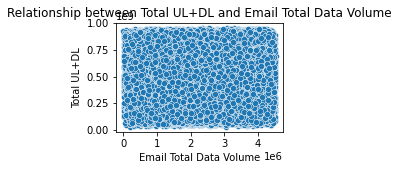

In [25]:
# 1. Scatter matrix of total social media data volume vs total data volume

plt.figure(figsize=(3, 2))
sns.scatterplot(data = df_clean, x='Email Total Data Volume', y='Total UL+DL')
plt.title('Relationship between Total UL+DL and Email Total Data Volume')
plt.show()

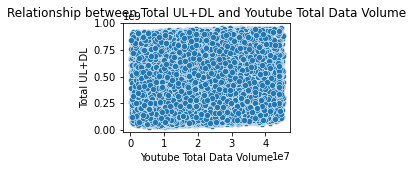

In [26]:
# 2. Scatter matrix of total youtube data volume vs total data volume

plt.figure(figsize=(3, 2))
sns.scatterplot(data = df_clean, x='Youtube Total Data Volume', y='Total UL+DL')
plt.title('Relationship between Total UL+DL and Youtube Total Data Volume')
plt.show()

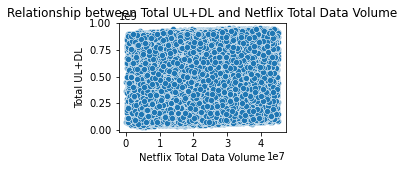

In [27]:
# 3. Scatter matrix of total netflix data volume vs total data volume

plt.figure(figsize=(3, 2))
sns.scatterplot(data = df_clean, x='Netflix Total Data Volume', y='Total UL+DL')
plt.title('Relationship between Total UL+DL and Netflix Total Data Volume')
plt.show()

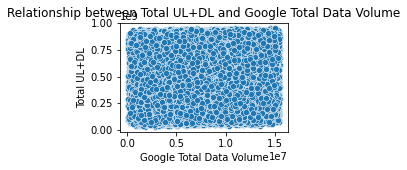

In [28]:
# 4. Scatter matrix of total google data volume vs total data volume

plt.figure(figsize=(3, 2))
sns.scatterplot(data = df_clean, x='Google Total Data Volume', y='Total UL+DL')
plt.title('Relationship between Total UL+DL and Google Total Data Volume')
plt.show()

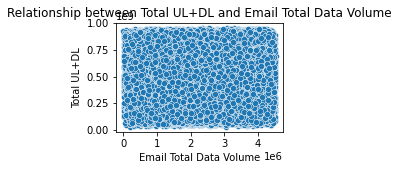

In [29]:
# 5. Scatter matrix of total email data volume vs total data volume

plt.figure(figsize=(3, 2))
sns.scatterplot(data = df_clean, x='Email Total Data Volume', y='Total UL+DL')
plt.title('Relationship between Total UL+DL and Email Total Data Volume')
plt.show()

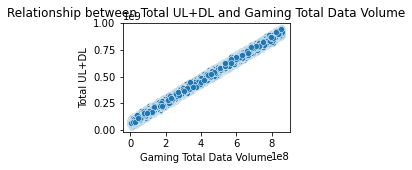

In [30]:
# 6. Scatter matrix of total gaming data volume vs total data volume

plt.figure(figsize=(3, 2))
sns.scatterplot(data = df_clean, x='Gaming Total Data Volume', y='Total UL+DL')
plt.title('Relationship between Total UL+DL and Gaming Total Data Volume')
plt.show()

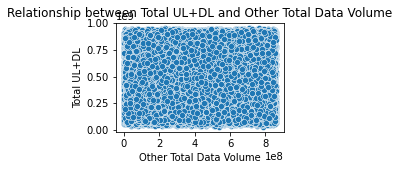

In [31]:
# 7. Scatter matrix of total other data volume vs total data volume

plt.figure(figsize=(3, 2))
sns.scatterplot(data = df_clean, x='Other Total Data Volume', y='Total UL+DL')
plt.title('Relationship between Total UL+DL and Other Total Data Volume')
plt.show()

## Variable Transformation

Segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class

## Correlation Analysis

Compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data

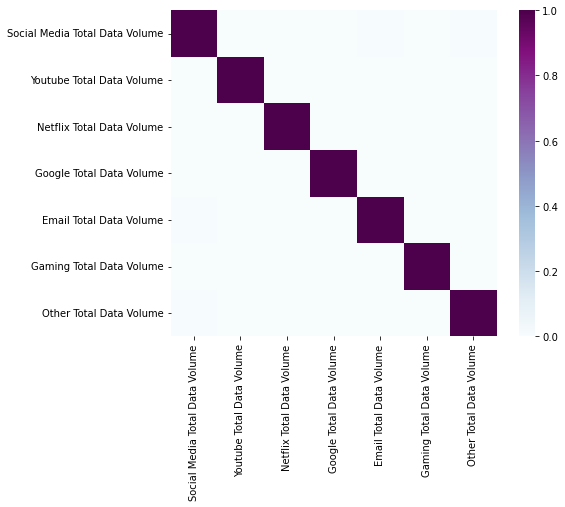

In [32]:
# computing the correlation matrix

df_corr = df_clean[['Social Media Total Data Volume', 'Youtube Total Data Volume', 'Netflix Total Data Volume', 
                  'Google Total Data Volume', 'Email Total Data Volume', 'Gaming Total Data Volume', 
                  'Other Total Data Volume']]

    
corr = df_corr.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,annot=False, annot_kws={"size": 10}, cmap="BuPu")

## Dimensionality Reduction

Perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results

In [34]:
new_numerical = [] #this leaves out the categorical columns that were encoded but not replaced
for col in df_clean.columns:
    if df_clean[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        new_numerical.append(col)
        
seg = df_clean[new_numerical].copy()
seg = seg.drop(['MSISDN/Number'], axis = 1) #drop the id col
scaler = StandardScaler()
scaled_data = scaler.fit_transform(seg)

scaled_data.shape

pca = PCA()
pca.fit(scaled_data)

pca.explained_variance_ratio_

plt.figure(figsize = (13,10))
plt.plot(range(64), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')
plt.grid(True)

"""When choosing the number of components, the number cutting at least 80% of the cumm explained variance is considered.
**n = 23**
"""

pca = PCA(n_components = 23)
pca.fit(scaled_data)

pca_scores = pca.transform(scaled_data)

# new_data_df = pd.concat([seg.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
# c.columns.values[-2:] = ['component1', 'component2']
# new_data_df.head() #contains the original cols 

a = pd.DataFrame(pca_scores)
a['MSISDN/Number'] = df_clean['MSISDN/Number']
a.head()

#plotting the first 2 components since they explain most of the variability.
plt.figure(figsize=(12,10))
sns.scatterplot(x= a[0], y = a[1], hue = a['MSISDN/Number'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').